<a href="https://colab.research.google.com/github/hirotakaster/imagesearch/blob/main/OpenCV_SIFT_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCVのインストール
SIFT/OpenCVを利用するため関係パッケージをインストールする。

画像データはgithub上にある物を利用する。

In [1]:
!pip install opencv-python==4.4.0.46
!pip install opencv-contrib-python==4.4.0.46
!git clone https://github.com/hirotakaster/imagesearch

     |████████████████████████████████| 49.5 MB 2.0 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 55.7 MB 1.2 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
Cloning into 'imagesearch'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 141 (delta 0),

## Utility関係の関数 

In [2]:
import cv2
import matplotlib.pyplot as plt
import re

def show_image_files(images, figsize=(20,10), columns = 5):
  plt.figure(figsize=figsize)
  for i, f in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB))


## 検索用画像の特徴点を取得する

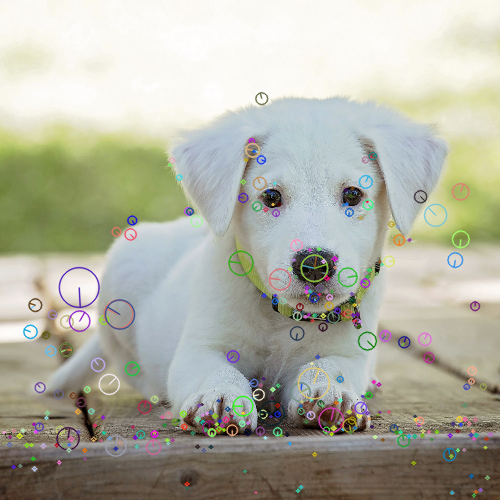

In [3]:
import cv2
import glob
from google.colab.patches import cv2_imshow

# BFMatcher : 特徴点のマッチングをL2ノルムで行う。
# 特徴点の抽出はSIFTを利用(n_features : 抽出する特徴点は500個)
IMG_SIZE = (500, 500)
n_features = 500
bf = cv2.BFMatcher(cv2.NORM_L2)
detector = cv2.SIFT_create (n_features)

# 検索画像(test/008.jpeg)を読込・グレースケールに変換
# 画像サイズIMG_SIZE(500, 500)に変換する
base_img = cv2.imread('imagesearch/data/test/008.jpeg')
target_gray = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
target_img = cv2.resize(target_gray, IMG_SIZE)

# 特徴点を抽出する、target_kp : 特徴点、target_des : 特徴量
(target_kp, target_des) = detector.detectAndCompute(target_img, None)

# 特徴点を表示
img_sift = cv2.drawKeypoints(cv2.resize(base_img, IMG_SIZE), target_kp, None, flags=4)
cv2_imshow(cv2.resize(img_sift, (IMG_SIZE)))


## 画像データを読み込んで読み込んで特徴点のマッチングして距離を取得:

In [4]:
# 類似画像検索対象のデータを読込
files = glob.glob("imagesearch/data/train/*.jpeg")
ret = []

for f in files:
  # グレースケールに変換・サイズをIMG_SIZE(500,500)に合わせて
  # 特徴点を抽出する
  comp_img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
  comp_img = cv2.resize(comp_img, IMG_SIZE)
  (comp_kp, comp_des) = detector.detectAndCompute(comp_img, None)

  # 検索画像と特徴量とマッチングを行う
  matches = bf.match(target_des, comp_des)

  # マッチングした結果、画像間の平均距離を取得(全体距離/特徴点数)する
  # 結果は配列(ret)に”ファイル名、距離”として保存しておく
  dist = [m.distance for m in matches]
  l = sum(dist) / len(dist)
  ret.append({'file': f, 'dist' : l})

## 検索画像から近い順に表示

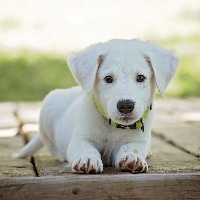

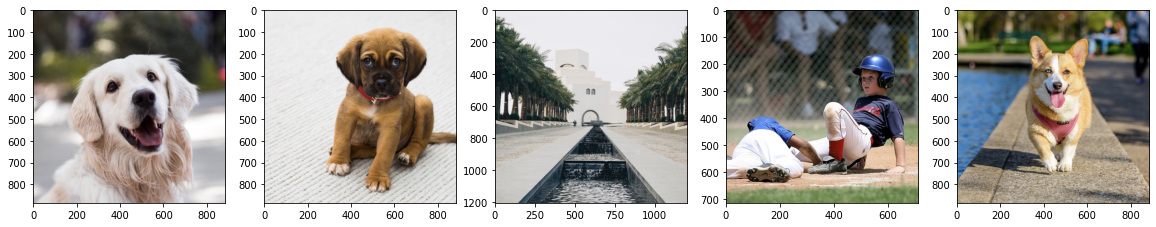

In [6]:
# 距離の近しい5個を表示する
ret = sorted(ret, key=lambda x: x['dist'])
cv2_imshow(cv2.resize(base_img, (200, 200)))
show_image_files([d.get('file') for d in ret[:5]])